# Variables

In [1]:
import latenta as la
import scanpy as sc

Modelling typically consists of several steps:
1. Creating known and unknown variables
2. Connect these variables in a graph structure
3. Infer the value of the unknown variables
4. Interpret the model

In this tutorial, we give a brief overview of the first two steps. More details on using latenta to interpret specific types of datasets can be found in the [tutorials](/tutorials), while detailed explanations on specific problems (e.g. the cell cycle) can be found in the [user guide](/guide).

While we will use a simple single-cell transcriptomics dataset as demonstration, in these tutorials we will primarily focus on the core that are relevant to any type of modality, latent space and experimental design.

In [2]:
adata = la.data.load_myod1()

In [3]:
import numpy as np

sc.pp.normalize_per_cell(adata)
sc.pp.log1p(adata)

sc.pp.combat(adata)
sc.pp.pca(adata)

sc.pp.neighbors(adata)
sc.tl.umap(adata)

adata.obs["log_overexpression"] = np.log1p(adata.obs["overexpression"])

/home/wsaelens/projects/probabilistic-cell/.venv/lib/python3.8/site-packages/anndata/_core/anndata.py:1220: FutureWarning: The `inplace` parameter in pandas.Categorical.reorder_categories is deprecated and will be removed in a future version. Removing unused categories will always return a new Categorical object.
  c.reorder_categories(natsorted(c.categories), inplace=True)
... storing 'dissociation' as categorical
/home/wsaelens/projects/probabilistic-cell/.venv/lib/python3.8/site-packages/anndata/_core/anndata.py:1220: FutureWarning: The `inplace` parameter in pandas.Categorical.reorder_categories is deprecated and will be removed in a future version. Removing unused categories will always return a new Categorical object.
  c.reorder_categories(natsorted(c.categories), inplace=True)
... storing 'gene_overexpressed' as categorical
/home/wsaelens/projects/probabilistic-cell/.venv/lib/python3.8/site-packages/anndata/_core/anndata.py:1220: FutureWarning: The `inplace` parameter in pandas

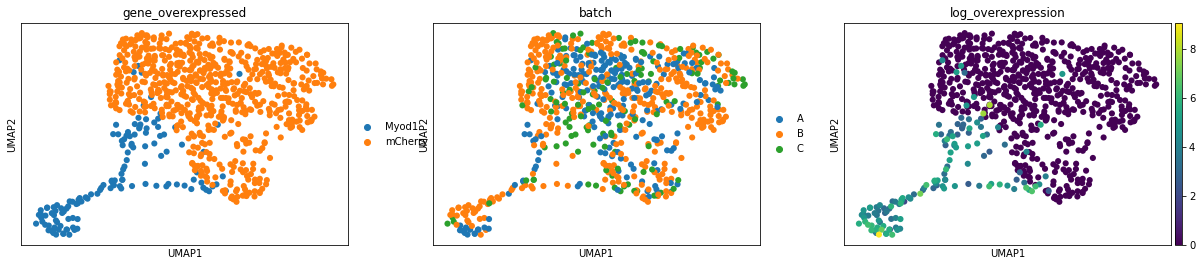

In [4]:
sc.pl.umap(adata, color=["gene_overexpressed", "batch", "log_overexpression"])

In this data, we have overexpressed the transcription factor Myod1 in a stem cell line in different batches. As output, we get the transcriptome along with a measure of which gene was overexpressed, and by how much.

## Definition

A variable in latenta is a representation of a tensor, meaning it is a set of numbers that live in zero (scalar), one (vector), two (matrix) or more dimensions. Each dimension of a variable has coordinates (`.coords`), and identifier (`.id`). Furthermore, a dimension can also be annotation with a label, symbol and/or description.

A "genes" dimension could be defined as follows:

In [5]:
genes = la.Dim(adata.var.index, id="gene")
genes

Dim gene

We can also simply provide a pandas series/index, although we have to take care to set the `index.name`:

In [6]:
adata.var.index.name = "gene"
genes = la.Dim(adata.var.index)
genes

Dim gene

Similarly, for cells:

In [7]:
adata.obs.index.name = "cell"
cells = la.Dim(adata.obs.index, id="cell")
cells

Dim cell

A count matrix is a prototypical example of a variable. We can define how it should look like, without any data, using {class}`la.Definition()`:

In [8]:
counts_definition = la.Definition([cells, genes], "counts")
counts_definition

counts: Definition [cell (799), gene (2047)]

## Fixed variables

Fixed variables contain a tensor that never changes:

In [9]:
counts = la.Fixed(adata.X, definition=counts_definition)

You can _run_ a variable by calling it's run function:

In [10]:
counts.run()

The value can be accessed as well. Because we're working with torch, this value is a `torch.tensor`:

In [11]:
counts.value

tensor([[ 3.3665e+00,  8.3920e-02,  6.2101e-01,  ...,  9.8500e-03,
          9.6566e-03,  2.8354e-02],
        [ 3.2421e+00, -2.8926e-02,  1.3100e-01,  ..., -3.1189e-03,
         -3.9272e-03, -1.6341e-02],
        [ 4.3922e+00, -5.8078e-02,  5.9200e-01,  ..., -3.2546e-03,
         -5.0767e-03, -1.3175e-02],
        ...,
        [ 6.6156e-01,  5.5089e-01,  1.9996e+00,  ..., -3.1189e-03,
         -3.9272e-03, -1.6341e-02],
        [ 3.7754e-03,  9.3089e-01,  1.2229e+00,  ..., -3.1189e-03,
         -3.9272e-03, -1.6341e-02],
        [ 7.7236e-01, -2.8926e-02,  2.1989e+00,  ..., -3.1189e-03,
         -3.9272e-03, -1.6341e-02]])

Because our variable is annotated, we can also get this same value as a dataframe:

In [12]:
counts.value_pd.head()

gene,ENSMUSG00000000031,ENSMUSG00000000058,ENSMUSG00000000078,ENSMUSG00000000184,ENSMUSG00000000202,ENSMUSG00000000247,ENSMUSG00000000486,ENSMUSG00000000489,ENSMUSG00000000555,ENSMUSG00000000567,...,ENSMUSG00000115801,ENSMUSG00000116097,ENSMUSG00000116226,ENSMUSG00000116287,ENSMUSG00000116733,ENSMUSG00000117278,ENSMUSG00000117515,ENSMUSG00000117710,ENSMUSG00000118106,ENSMUSG00000118365
cell,,,,,,,,,,,,,,,,,,,,,
AAAGATGAGGCAATTA-1-5,3.366529,0.083920,0.621007,0.401507,0.029294,0.015265,0.021296,0.018616,0.692346,0.175859,...,0.039710,0.007747,0.018680,0.003235,0.013047,0.007835,-0.016735,0.009850,0.009657,0.028354
AAATGGAGTACGTACT-1-7,3.242099,-0.028926,0.131003,0.511935,0.939495,-0.002911,-0.008375,0.213077,-0.091554,0.800852,...,0.006627,-0.008201,-0.008495,-0.002689,-0.003129,-0.001689,0.459602,-0.003119,-0.003927,-0.016341
AAGACTCTCCGCACTT-1-9,4.392151,-0.058078,0.591996,-0.035182,0.178822,-0.010825,-0.009041,0.435921,0.157620,0.434834,...,0.731178,-0.007789,-0.011596,0.012630,-0.005546,-0.005613,0.037909,-0.003255,-0.005077,-0.013175
AAGGTAATCCTATTTG-1-8,3.063940,0.247491,1.859189,1.257055,-0.004892,-0.002911,-0.008375,-0.013225,0.238253,0.803076,...,0.006627,-0.008201,-0.008495,-0.002689,-0.003129,-0.001689,0.024088,-0.003119,-0.003927,-0.016341
AATCGACTCGTTCTGC-1-7,3.216493,-0.028926,-0.090681,0.372135,1.766135,-0.002911,-0.008375,-0.013225,-0.091554,0.825823,...,0.006627,-0.008201,-0.008495,0.577340,-0.003129,-0.001689,0.024088,-0.003119,-0.003927,-0.016341


Do note that we can also provide pandas and xarray objects to {class}`Fixed`, and the definition of a variable will be inferred from the object's indices (if we gave them proper names).

In [13]:
overexpression = la.Fixed(
    adata.obs["log_overexpression"], label="overexpression", symbol="overexpression"
)
overexpression

overexpression:  ↦ Fixed [cell (799)]

Note that we did not provide a definition to this variable, but it was inferred from the series you provided based on the index name (`adata.obs["leiden"].index.name`). The first dimensions of both our `counts` and `leiden` are therefore equal:

In [14]:
overexpression[0] == counts[0]

True

For discrete fixed variables, we often like to work in a "one-hot" encoding, meaning that we get a binary (True/False) matrix if a sample (cell) is part of a particular group (cluster). We can use `la.discrete.DiscreteFixed` to do this conversion by providing it with a categorical pandas series:

```{margin}
A pandas categorical series is equivalent to R's factor
```

In [15]:
adata.obs["gene_overexpressed"]

cell
AAAGATGAGGCAATTA-1-5      Myod1
AAATGGAGTACGTACT-1-7      Myod1
AAGACTCTCCGCACTT-1-9      Myod1
AAGGTAATCCTATTTG-1-8      Myod1
AATCGACTCGTTCTGC-1-7      Myod1
                         ...   
TTTATGCCATACGCTA-1-5    mCherry
TTTCACATCCGGGACT-1-7    mCherry
TTTGATCAGATGCAGC-1-8    mCherry
TTTGATCAGCGATCGA-1-8    mCherry
TTTGGAGAGATTGATG-1-8    mCherry
Name: gene_overexpressed, Length: 799, dtype: category
Categories (2, object): ['Myod1', 'mCherry']

In [16]:
overexpressed = la.variables.DiscreteFixed(adata.obs["gene_overexpressed"])
overexpressed

gene_overexpressed:  ↦ DiscreteFixed [cell (799), gene_overexpressed (2)]

In [17]:
overexpressed.run()
overexpressed.value_pd.head()

gene_overexpressed,Myod1,mCherry
cell,,
AAAGATGAGGCAATTA-1-5,1.0,0.0
AAATGGAGTACGTACT-1-7,1.0,0.0
AAGACTCTCCGCACTT-1-9,1.0,0.0
AAGGTAATCCTATTTG-1-8,1.0,0.0
AATCGACTCGTTCTGC-1-7,1.0,0.0


## Parameters

Parameters are variables that are unknown and have to be inferred (optimized) based on our data. Parameters do require a starting default value.

In [18]:
lfc = la.Parameter(0.0, definition=la.Definition([genes]), label="lfc", symbol="lfc")
lfc

lfc:  ↦ Parameter [gene (2047)]

A combination of fixed and parameter variables form the leaves of our model. Any other types of variables in our models are ultimatily constructed from these leaf variables.

Although parameters are _free_, they can still have constraints. For example, the average expression of a gene can never go below zero, as this would be non-sensical. However, most algorithms cannot directly cope with these constraints and really like to work with parameters that can go from $-\infty$ to $+\infty$ (especially if you also want flexibility). We can solve this by transforming each parameter to make sure they fit our constraints.

Frequently used transformations are:

Description | Support | Transform | Formula
--- | --- | --- | ----
All positive numbers | $R^+$ | `.Exp()` | $e^x$
Unit interval | $[0, 1]$ | `.Logistic()` | $\frac{1}{1+e^{-x}}$
Circular (i.e. an angle) | $[0, 2\pi[$ | `.Circular()` | $atan2(y, x)$
Simplex | $\in {0, 1} \wedge \sum = 1$ | `.Softmax()` | $\frac{e^{x_i}}{\sum_i e^{x_i}}$

In [19]:
baseline = la.Parameter(
    1.0,
    definition=la.Definition([genes]),
    label="baseline",
    symbol="baseline",
    transforms=[la.transforms.Exp()],
)
baseline

baseline:  ↦ Parameter [gene (2047)]

## Computed

We use variables to compute things. In this case we create a variable that depends on other variables, which we call components:

In [20]:
expression = la.links.scalar.Linear(overexpression, a=lfc, label="expression")

In [21]:
expression

expression: x, a ↦ Linear [cell (•), gene (•)] = $lfc\;\cdot\;overexpression\require{action}$

Both dimensions of this variable are **broadcasted**, meaning that their coordinates and size are set by upstream components (signified by a •).

The actual definition of the variable can be obtained using `.value_definition`:

In [22]:
expression.value_definition

??: Definition [cell (799), gene (2047)]

A critical tool when building complex models is to plot how different variables are related in the graph structure:


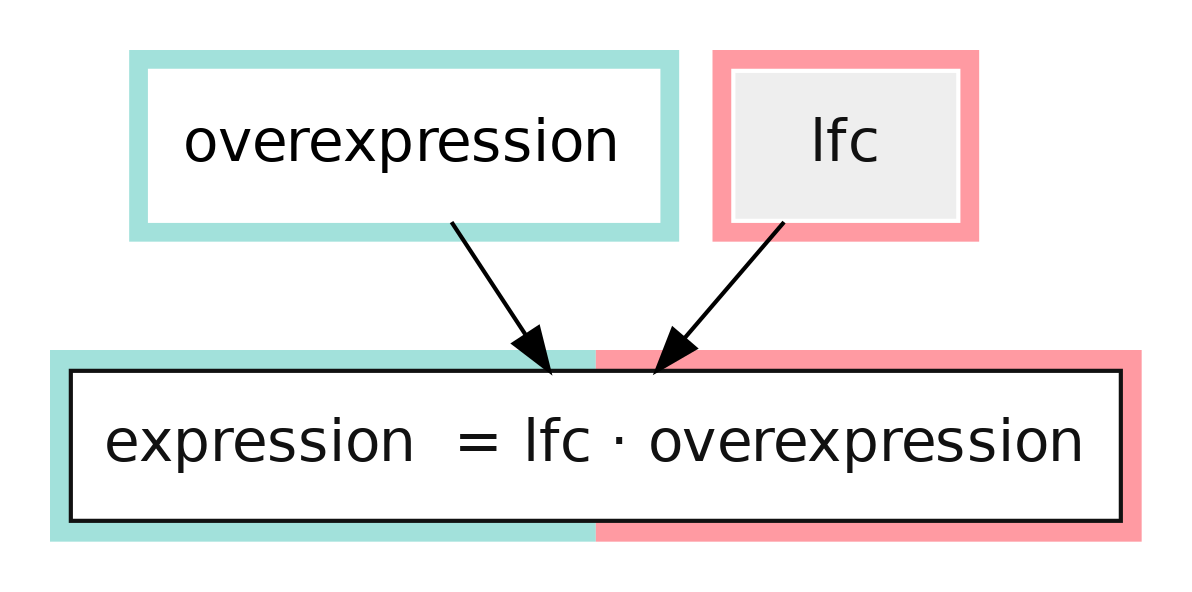

In [23]:
expression.plot()

:::{seealso}
Visualization and introspection of models is further discussed in the [guide](/guide/introspect)
:::

Components can be accessed using python's dot notation:

In [24]:
expression.a

lfc:  ↦ Parameter [gene (2047)]

Often, you can still add or change components after we have initialized the variable:

In [25]:
expression.b = baseline


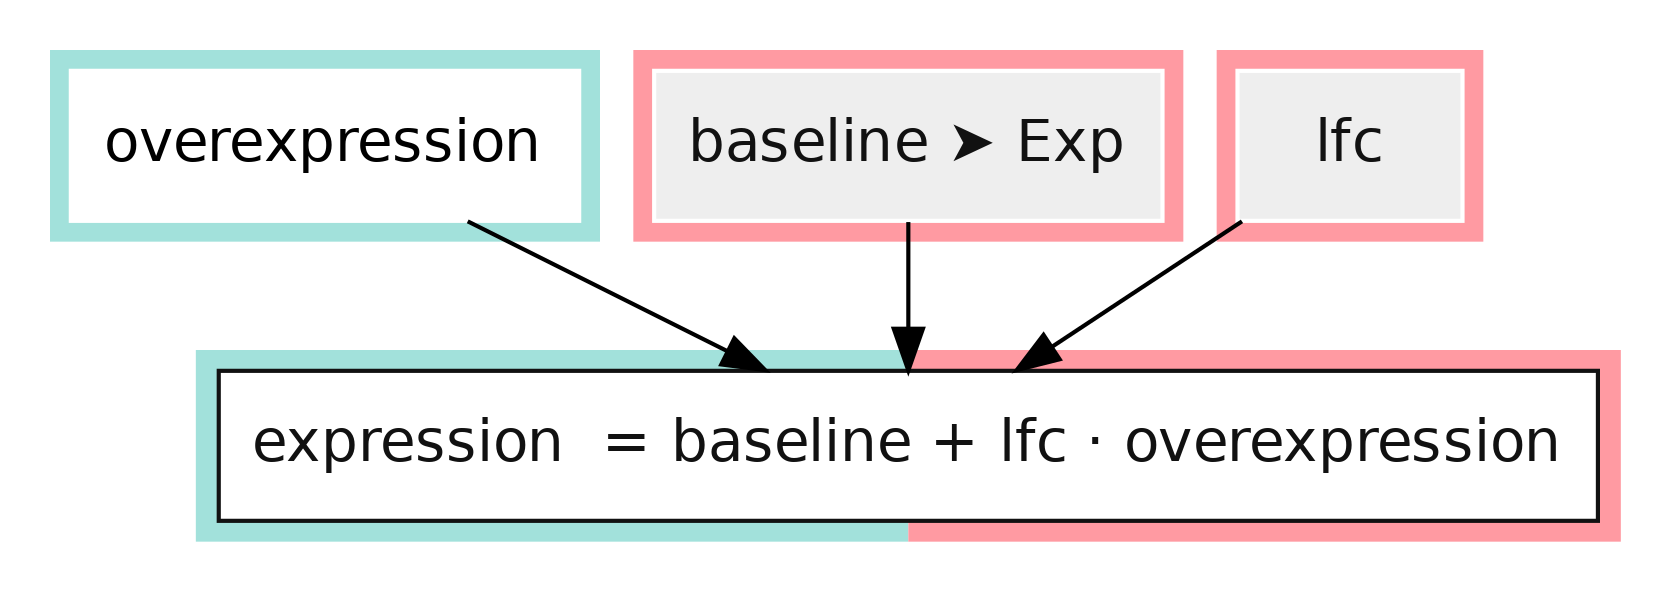

In [26]:
expression.plot()

Frequently occuring component names are:

Name | Component | Symbol | Description
--- | --- | --- | ----
Input | `.x` | $x$ | What you put into a computed variable
Coefficients, weight, slope | `.a` | $a$ | How much an input affects the output
Intercept,  bias | `.b` | $b$ | The baseline value of the output
Skew, rate | `.skew`, `.rate` | $\gamma$ or $\lambda$ | Scales the input
Shift | `.shift` | $\zeta$ | Shifts the input


## Distributions

We are often uncertain about the value of some variables, and this uncertainty is encoded as a distribution. A distribution has two characteristics:
- We can take a random sample. For example, we roll a dice and get 3
- We can calculate the probability of a particular sample, also known as the likelihood. For example, in a normal dice the probability of observing a 3 is 1/6

A lot of commonly used distributions have an _average_, also called a location, loc, mu or mean, and an _uncertainty_, also called the standard deviation, sigma, scale or dispersion.

Distributions often have the following components:

Name | Component | Symbol | Description
--- | --- | --- | ----
Location | `.loc` | $\mu$ | The mean, changing this parameter simply shifts the probability function
Mean | `.mu` | $\mu$ | The mean, in case it is not a location parameter
Scale | `.scale` | $\sigma$ | Measure of variability, changing this parameter simply scales the probability function
Dispersion | `.dispersion` | $\theta$ | Measure of variability, in case it is not a scale parameter
Probability | `.probs` | $p$ | A probability of success
Total counts | `.total_counts` | $n$ | Number of tries

Depending on the distribution, individual elements of a sample can be dependent. This dependence can be specific to particular dimensions. For example, if we would sample from a OneHotCategorical distribution, there can only be one 1 in every row:

A distribution we typically use for count data is a negative binomial, and more specifically the `NegativeBinomial2` variant that has two input parameters: the average count and the dispersion.

```{margin}
The naming conventions used are those from ProbOnto (https://sites.google.com/site/probonto/home) whenever available.
```

In [27]:
transcriptome_p = la.distributions.NegativeBinomial2(mu=expression)

Running a distribution will take a sample from it:

In [28]:
transcriptome_p.run()
transcriptome_p.value_pd.head()

gene,ENSMUSG00000000031,ENSMUSG00000000058,ENSMUSG00000000078,ENSMUSG00000000184,ENSMUSG00000000202,ENSMUSG00000000247,ENSMUSG00000000486,ENSMUSG00000000489,ENSMUSG00000000555,ENSMUSG00000000567,...,ENSMUSG00000115801,ENSMUSG00000116097,ENSMUSG00000116226,ENSMUSG00000116287,ENSMUSG00000116733,ENSMUSG00000117278,ENSMUSG00000117515,ENSMUSG00000117710,ENSMUSG00000118106,ENSMUSG00000118365
cell,,,,,,,,,,,,,,,,,,,,,
AAAGATGAGGCAATTA-1-5,2.0,0.0,0.0,1.0,1.0,0.0,0.0,1.0,1.0,2.0,...,1.0,0.0,1.0,3.0,0.0,4.0,2.0,0.0,3.0,0.0
AAATGGAGTACGTACT-1-7,1.0,0.0,3.0,1.0,0.0,1.0,0.0,3.0,1.0,1.0,...,0.0,4.0,0.0,1.0,0.0,3.0,1.0,0.0,0.0,1.0
AAGACTCTCCGCACTT-1-9,0.0,3.0,0.0,2.0,2.0,0.0,0.0,2.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,3.0,0.0,0.0,1.0,1.0
AAGGTAATCCTATTTG-1-8,0.0,2.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,9.0,...,1.0,1.0,1.0,1.0,0.0,1.0,0.0,0.0,3.0,0.0
AATCGACTCGTTCTGC-1-7,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,3.0,...,0.0,3.0,2.0,0.0,0.0,4.0,0.0,1.0,5.0,1.0


Because we model an observation as a distribution, we can calculate how likely this observation is according to this distribution. The goal of any modelling is to maximize this likelihood, while remaining within the constraints imposed by the model.

In [29]:
transcriptome_p.likelihood

tensor([[-2.0794, -0.6931, -0.6931,  ..., -0.6931, -2.7726, -0.6931],
        [-1.3863, -0.6931, -2.7726,  ..., -0.6931, -0.6931, -1.3863],
        [-0.6931, -2.7726, -0.6931,  ..., -0.6931, -1.3863, -1.3863],
        ...,
        [-4.1589, -1.3863, -0.6931,  ..., -1.3863, -0.6931, -7.6246],
        [-2.7726, -0.6931, -0.6931,  ..., -0.6931, -0.6931, -0.6931],
        [-0.6931, -1.3863, -0.6931,  ..., -0.6931, -0.6931, -2.0794]],
       grad_fn=<SubBackward0>)

## Observations

Observations are fixed variables that follow a distribution. An observation always has some physical connection to reality, but the problem is that we only observe a noisy variant of this reality. This noise is not always purely technical (due to stochastic sampling of mRNAs) but also typically contains biological components (such as transcriptional bursting). Essentially, any variation that cannot be explained by the model is explained away as noise. In our case, this noise is contained in the dispersion component of the Negative Binomial.


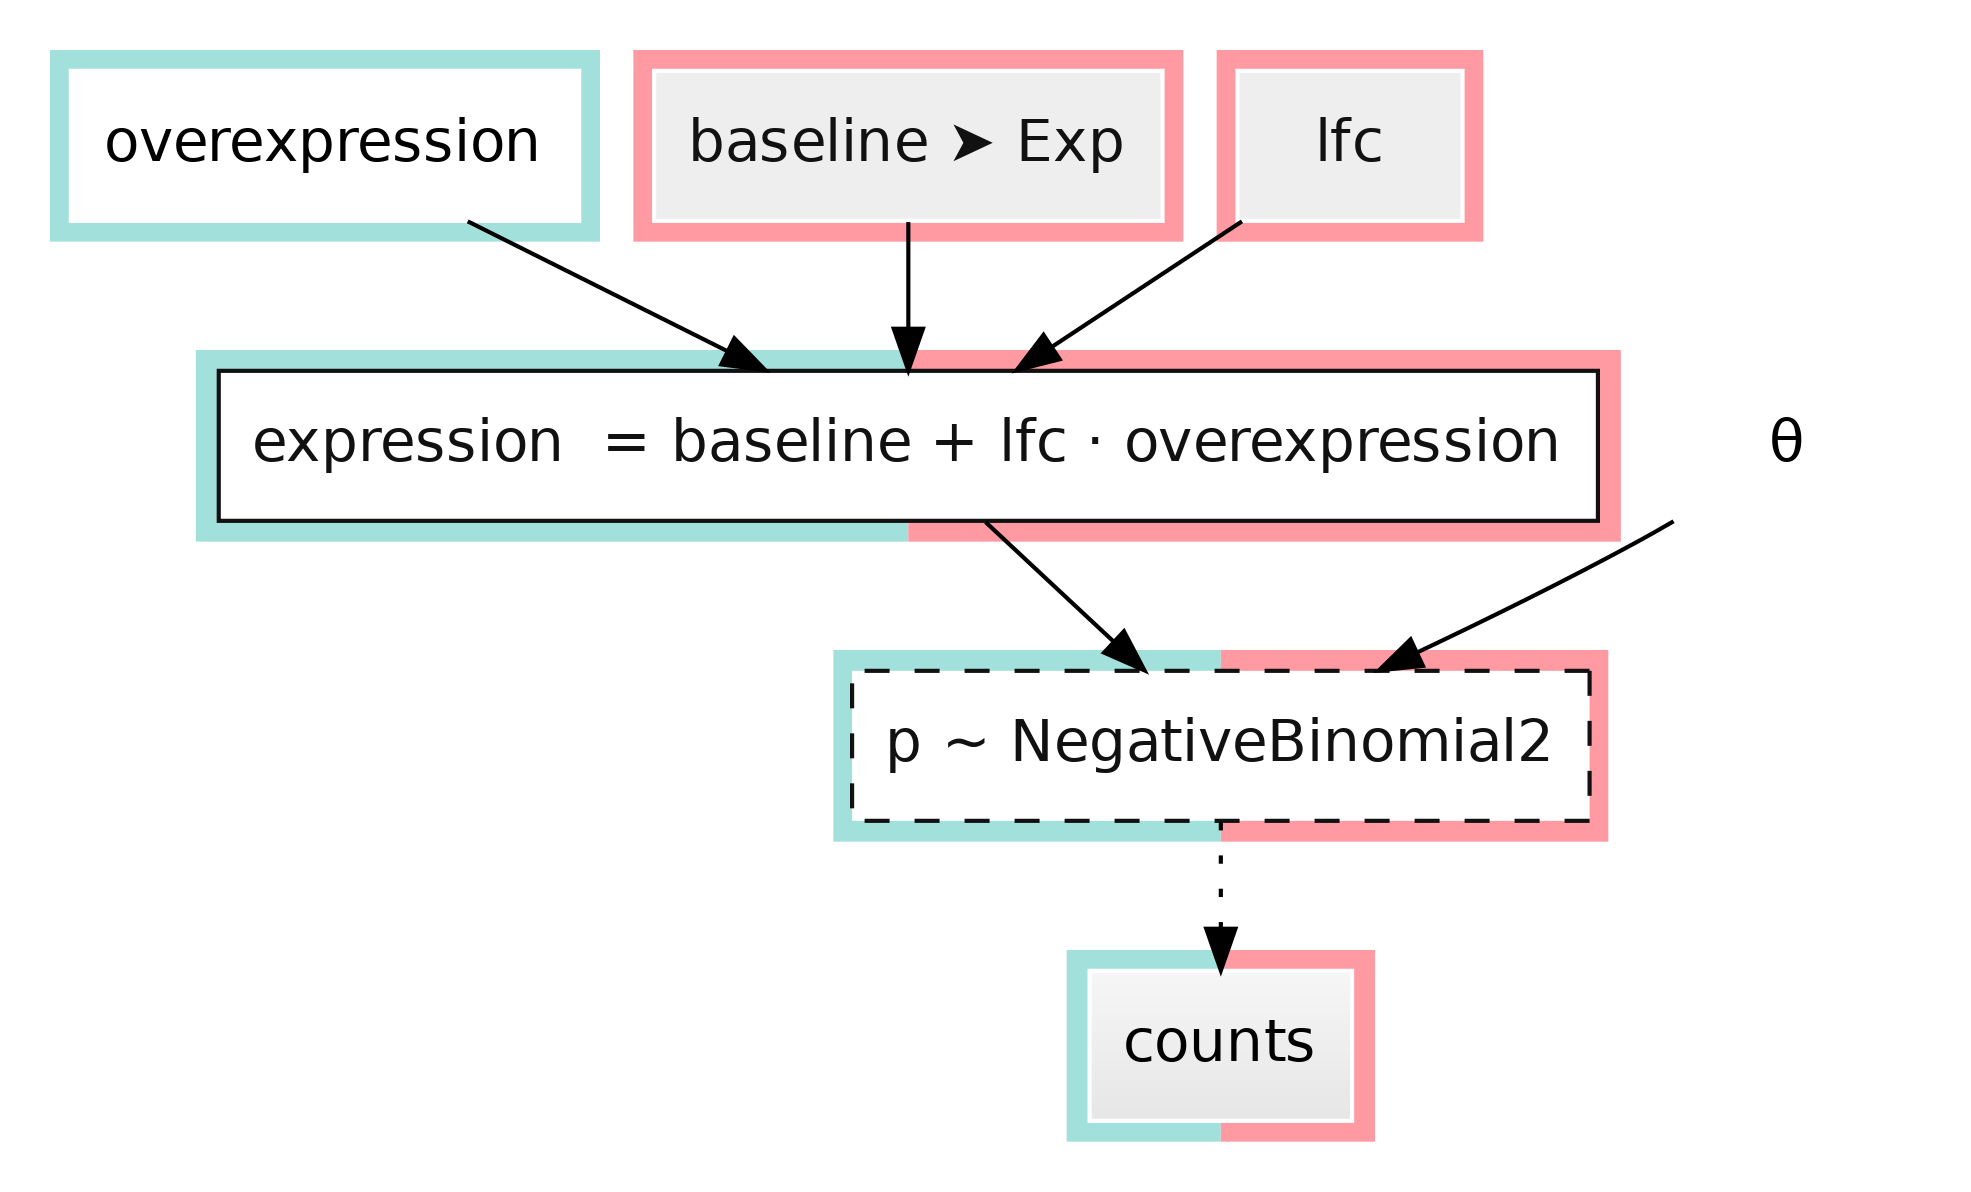

In [30]:
observation = la.Observation(adata.X, transcriptome_p, definition=counts_definition)

observation.plot()

Running an observation does the same thing as running a fixed variable

In [31]:
observation.run()

Because we model an observation as a distribution, we can calculate how likely this observation is according to this distribution. The goal of modelling is to maximize this likelihood, while remaining within the constraints imposed by the model.

In [32]:
observation.likelihood

tensor([[-3.0266, -0.7513, -1.1236,  ..., -0.7000, -0.6998, -0.7128],
        [-2.9404, -0.6731, -0.7840,  ..., -0.6910, -0.6904, -0.6818],
        [-3.7376, -0.6529, -1.1035,  ..., -0.6909, -0.6896, -0.6840],
        ...,
        [-1.1517, -1.0750, -2.0792,  ..., -0.6910, -0.6904, -0.6818],
        [-0.6958, -1.3384, -1.5408,  ..., -0.6910, -0.6904, -0.6818],
        [-1.2285, -0.6731, -2.2173,  ..., -0.6910, -0.6904, -0.6818]],
       grad_fn=<SubBackward0>)

## Latent

Latent variables are unknown but follow distribution, rather than having having one fixed value such as parameters. Latent variables are central to probabilistic modelling, because they encompass two types of uncertainty:

::::{margin}
:::{seealso}
https://en.wikipedia.org/wiki/Uncertainty_quantification#Aleatoric_and_epistemic_uncertainty
:::
::::

### Uncertainty inherent to the system
::::{margin}
:::{note}
In general, we call this _aleatoric uncertainty_. In bayesian modelling, this type of uncertainty is typically encoded as the prior distribution.
:::
::::

Let's say we are randomly taking a cell from a tissue. Every time we take such a sample, we don't have an idea about what type of cell it will be, except perhaps that some cell types are more likely because they are more abundant. This uncertainty is inherent to the population, and nothing we do can change that. We model this uncertainty an an appropriate probability distribution, which can have some known or unknown components.

This type of uncertainty is often of interest, and can provide some interesting biological information in more complex models. For example:
- How does cell type abundance change across different conditions?
- The distribution of all cell's pseudotime. Are there more early than late cells? Does this change between conditions?
- The distribution of the gene's fold changes. Are there more genes upregulated than downregulated? Are there a couple of genes with massive changes, while all other genes do not change at all?
- The effect of a transcription factor. Does it have many target genes with a subtle effect? Or a few target genes but with a very strong effect?

### Uncertainty because of lack of data

::::{margin}
:::{note}
In general, we call this _epistemic uncertainty_. In bayesian modelling, this type of uncertainty is typically encoded as the posterior.
:::
::::
Let's say we focus on one particular cell, and we want to know it's cell type. Naturally, before we have observed anything about this cell, our uncertainty will be the same as that inherent to the system (as described above). However, if we would now observe some gene expression, our uncertainty for this particular cell will decrease. The more genes we observe, the more certain we will become.

This type of uncertainty is not inherent to the cell. The cell does not change its celltype just because we are uncertain about it. It therefore does not have a direct connection to reality, but is simply an artefact of us not knowing enough. Nonetheless, modelling this uncertainty is crucial because it gives us an idea about how certain we are about a variable. For example:
- We may be very certain about a cell's cell type, but are very uncertain about the cellular state. This could tell us that we don't have enough sequencing depth to assign a cell's state.
- If a gene's fold-change can be both negative, positive and close to 0, we know we don't have enough data. This doesn't mean the gene is not differentially expressed, it simply means we don't have enough data know whether it is.
- It may be that two transcription factors can equally regulate in the model, and that we don't have enough data to say which one is more likely.

### Constructing a latent variable

Latent variables combine both types of uncertainty:

Name | Component | Symbol | Description
--- | --- | --- | ----
Prior distribution | `.p` | $p$ | The distribution followed by the variable. Note that this distribution can depend on other parameters, latent or fixed variables.
Variational distribution | `.q` | $q$ | An approximation of the posterior distribution, i.e. the distribution followed by a variable after observing the data. The parameters of this distribution can be estimated directly (i.e. as one or more Parameter) or through the observed data using amortization

A prototypical example of a latent variable is the slope (i.e. fold-change) in a linear model:


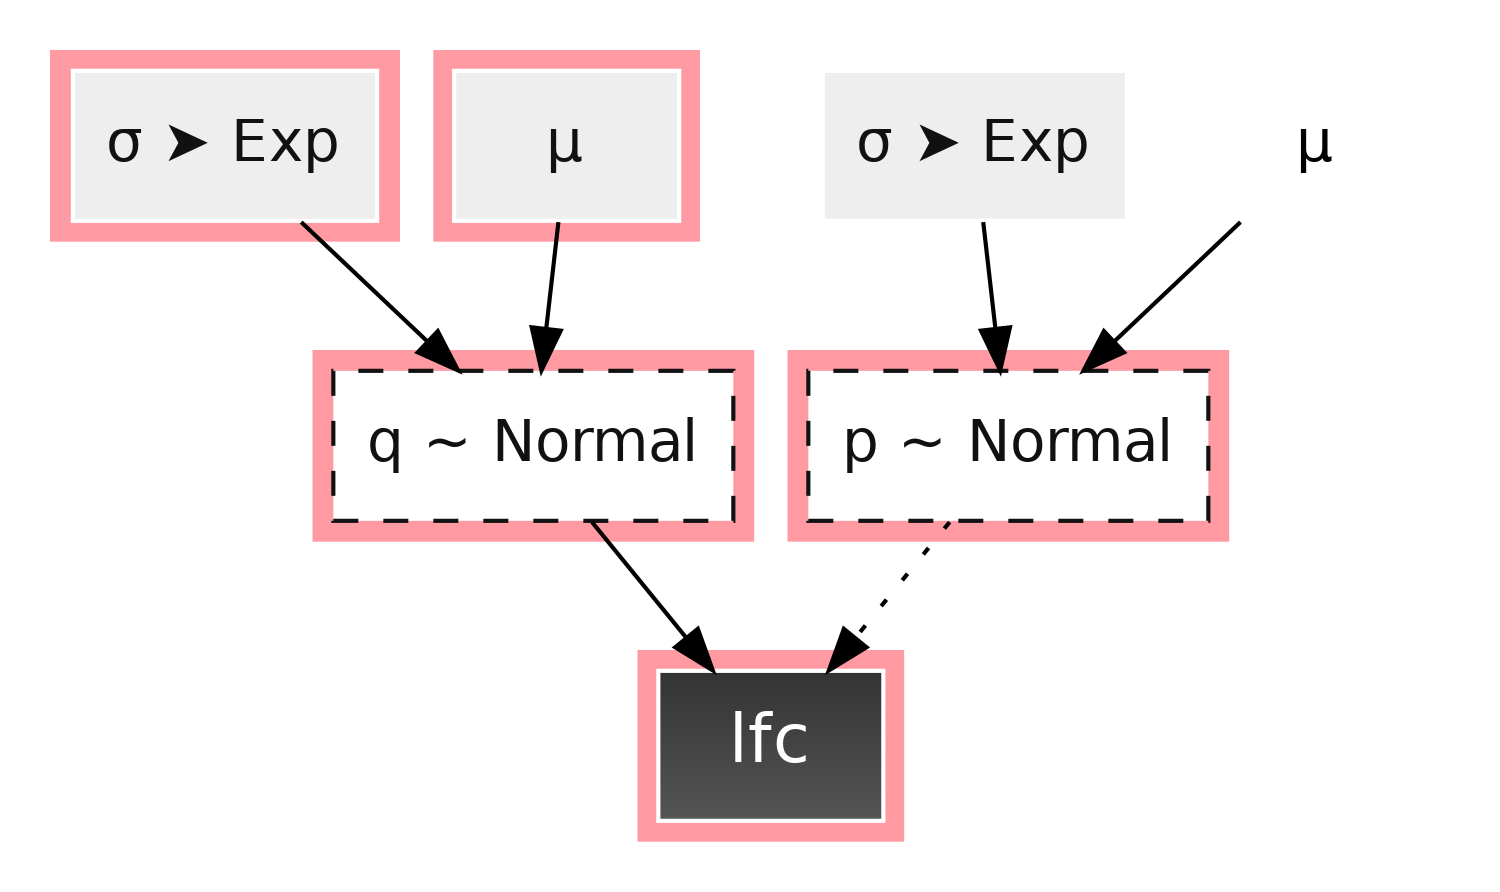

In [33]:
lfc_p = la.distributions.Normal(
    loc=0.0, scale=la.Parameter(1.0, transforms=[la.transforms.Exp()])
)
lfc = la.Latent(p=lfc_p, definition=la.Definition([genes]), label="lfc")
lfc.plot()

The prior distribution $p$ in this case is a normal distribution with one free parameter: the scale $\sigma$. This parameter determines how far the slope _on average_ can be different than 0. The only reason we can estimate this as a parameter is because we are pooling information across many genes. This kind of {term}`multi-level modelling` is very powerful, as it includes multiple testing correction directly within the model {citel}`gelman_why_2009`.

The variational distribution $q$ on the other hand contains two parameters both specific for each gene. These contain our idea of where the slope of a gene will lie: the location $\mu$ is the average, while the scale $\sigma$ our uncertainty.

Note that many link functions will create a latent variable automatically if you specify `True`, although you have to provide the correct definition if some dimensions cannot be inferred from other components:


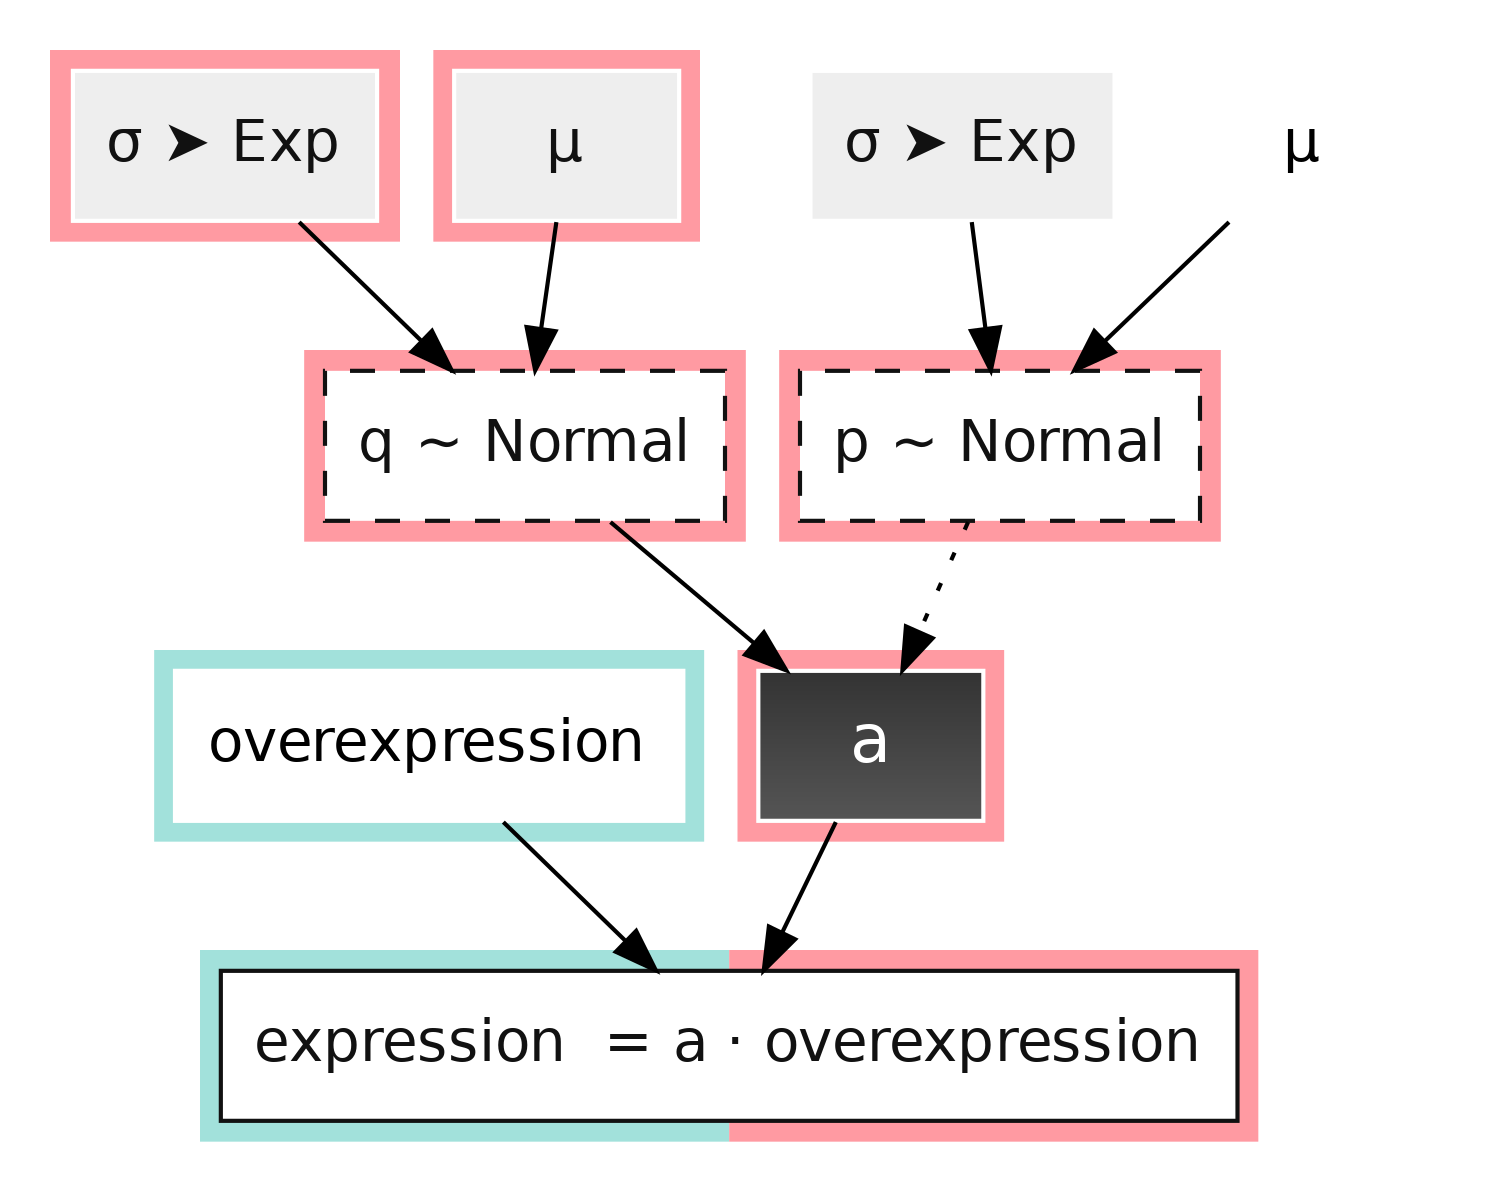

In [34]:
expression = la.links.scalar.Linear(
    overexpression,
    a=True,  # 👈
    label="expression",
    definition=la.Definition([cells, genes]),  # ⚠️
)
expression.plot()

:::{note}
Sometimes components of the prior distribution may themselves depend on a latent variable. In that case, this distribution will encompass both types of uncertainty. This would be the case for [most examples we gave for prior distributions](#uncertainty-inherent-to-the-system).
:::

Just like parameters, the two distributions of latent variables may also have transformations. This is for example the case if we would use a `.LogNormal` as prior, which only has a support on positive numbers:


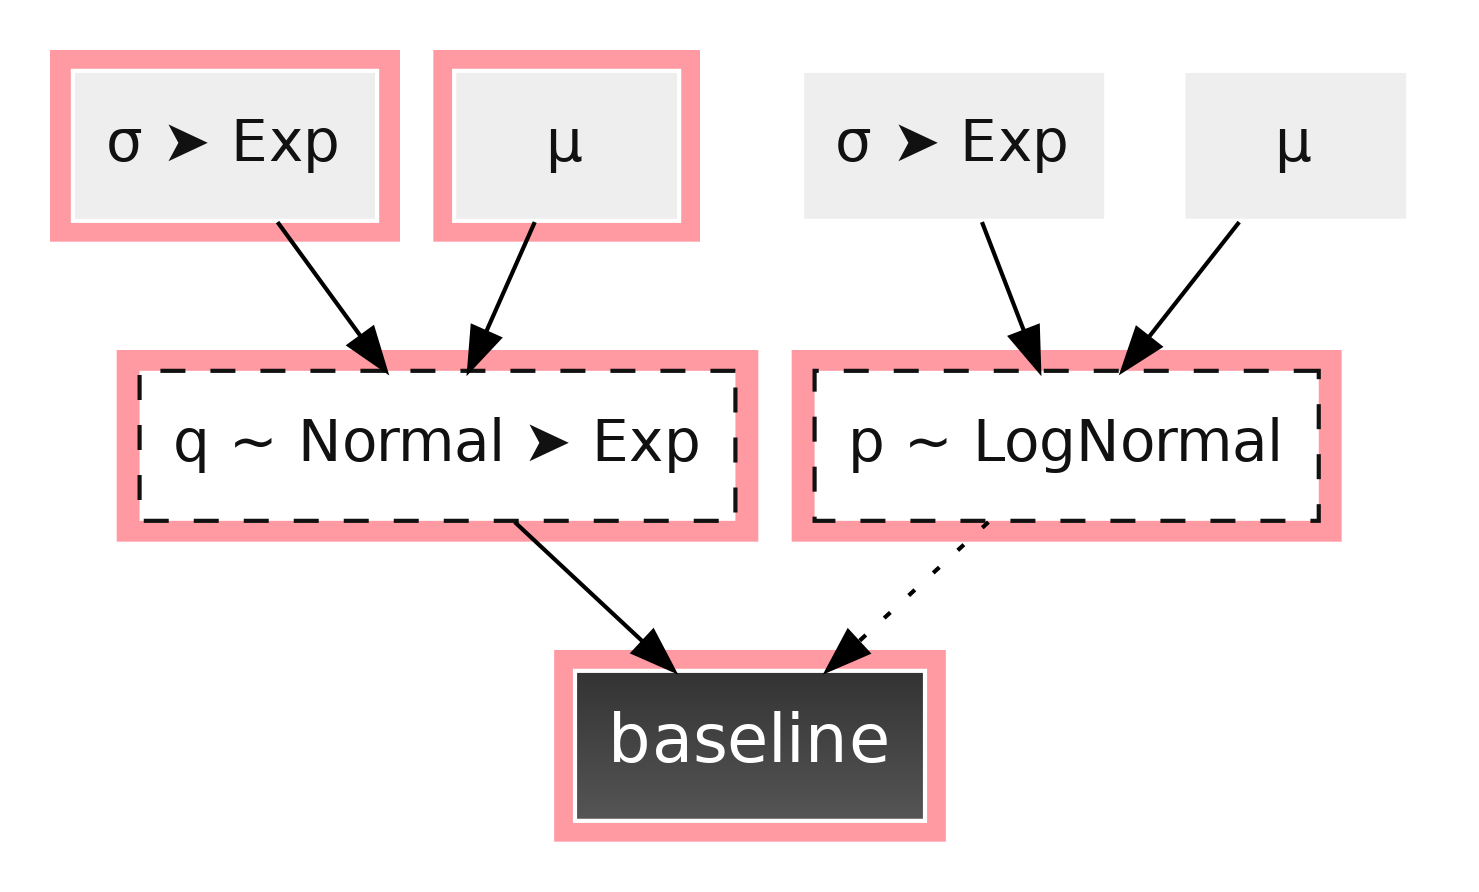

In [35]:
baseline_p = la.distributions.LogNormal(
    loc=la.Parameter(0.0), scale=la.Parameter(1.0, transforms=[la.transforms.Exp()])
)
baseline = la.Latent(p=baseline_p, definition=la.Definition([genes]), label="baseline")
baseline.plot()

## Main points
- Modelling is creating and connecting variables in a graph structure
- Leaf variables are the start of any model. Different types of leaf variables have different functions:
   - Fixed variables are provided by you or set to a reasonable default value
   - Parameters are free and have to be estimated from the data
   - Observations are fixed variables that follow a distribution
- Computed variables link different variables together in a deterministic way
- Distributions model uncertainty
- Latent variables are the variables we're most interested in, as they encompass both uncertainty inherent to the system and uncertainty due to the lack of data

Once we have specified a model, the next question is how we can find optimal values for the free parameters.